# Value at Risk Assessment Model

### Import Packages

In [11]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [8]:
# Number of shares
shares_MSFT = 1000

# Live stock price
price = yf.Ticker('MSFT')
price_MSFT = price.history().tail(1)['Close'].iloc[0]
print('MSFT')
print('------------------------')
print(price_MSFT) # iloc[0] returns the last row

MSFT
------------------------
426.8900146484375


30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [9]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4-week treasury bill rate)
rfr_MSFT = 0.02

# Volatility (30-day volatility at that time)
volatility_MSFT = 0.2629

### Simulations - Calculate Investment Returns

(array([  2.,   1.,   0.,   2.,   2.,   1.,   1.,   1.,   4.,   4.,   3.,
          4.,   3.,  11.,  11.,   7.,  13.,  18.,  13.,  18.,  27.,  26.,
         26.,  42.,  53.,  33.,  43.,  39.,  60.,  69.,  77.,  79.,  81.,
         97., 103., 102.,  90., 112., 117., 116., 134., 118., 125., 156.,
        133., 130., 132., 128., 142., 118., 138., 144., 131., 110., 120.,
        113., 125., 100., 109.,  86.,  91.,  87.,  86.,  83.,  72.,  70.,
         64.,  60.,  54.,  45.,  38.,  39.,  27.,  20.,  30.,  15.,  24.,
         18.,  14.,   6.,  10.,   4.,   6.,   8.,   4.,   1.,   3.,   4.,
          0.,   5.,   0.,   1.,   1.,   0.,   0.,   1.,   1.,   3.,   0.,
          2.]),
 array([-3.40174605, -3.33040754, -3.25906902, -3.18773051, -3.116392  ,
        -3.04505348, -2.97371497, -2.90237645, -2.83103794, -2.75969943,
        -2.68836091, -2.6170224 , -2.54568389, -2.47434537, -2.40300686,
        -2.33166834, -2.26032983, -2.18899132, -2.1176528 , -2.04631429,
        -1.97497578, -1.90

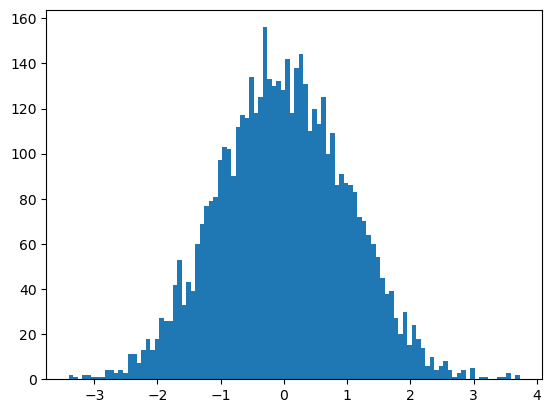

In [12]:
# Number of simulations
simulations = 50000

# Investment time in a year
t_MSFT = 21/252
sample = np.random.standard_normal(5000)
plt.hist(sample, bins=100)

In [13]:
print(np.mean(sample))
print(np.std(sample))

-0.005432397876409007
1.0202800927012572


In [ ]:
# Explain np.random.standard_normal


In [14]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, volatility, t, simulations):
    end_value = pv * np.exp((rfr - 0.5 * volatility**2) * t + np.random.standard_normal(simulations) * volatility * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, volatility_MSFT, t_MSFT, simulations)


### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [16]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.
X = 0.9
Y = 3455.248
print('VaR at {:.0%} confidence level: ${:,.0f}'.format(X,Y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-40,299
VaR at 95% confidence level: $-50,830
VaR at 99% confidence level: $-70,390


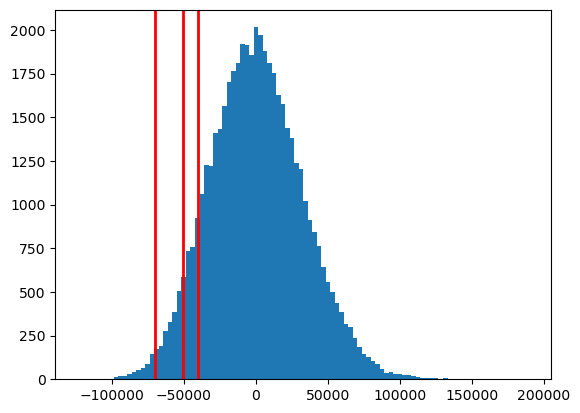

In [17]:
# Plot the returns
from numpy import percentile

percentile = [10, 5, 1]
plt.hist(returns_MSFT, bins = 100);

# Show VaR at 90%, 95%, and 99% confidence level
for i in percentile:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT, i)
    print('VaR at {:.0%} confidence level: ${:,.0f}'.format(confidence, value))
    plt.axvline(value, color = 'red', linewidth = 2)